In [1]:
from geoplot import utils
import geoplot as gplt
from geoplot import crs as gcrs
import geopandas as gpd
import pandas as pd
import shapely
import numpy as np
import matplotlib.pyplot as plt

In [2]:
savefig_kwargs = {'bbox_inches': 'tight', 'pad_inches': 0.25}

In [ ]:
!mkdir ../figures/pointplot
!mkdir ../figures/kdeplot
!mkdir ../figures/polyplot
!mkdir ../figures/cartogram
!mkdir ../figures/aggplot
!mkdir ../figures/sankey
!mkdir ../figures/choropleth
!mkdir ../figures/voronoi

# Load example data

In [4]:
cities = gpd.read_file(gplt.datasets.get_path('usa_cities'))
boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
dc = gpd.read_file(gplt.datasets.get_path('dc_roads'))
census_tracts = gpd.read_file(gplt.datasets.get_path('ny_census'))
collisions = gpd.read_file(gplt.datasets.get_path('nyc_collision_factors'))
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))

# Pointplot

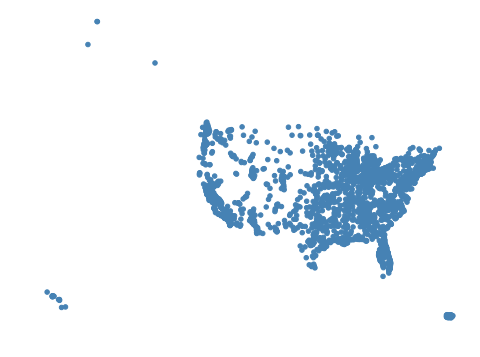

In [16]:
points = utils.gaussian_points()
gplt.pointplot(cities)
plt.savefig('../figures/pointplot/pointplot-initial.png', **savefig_kwargs)

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


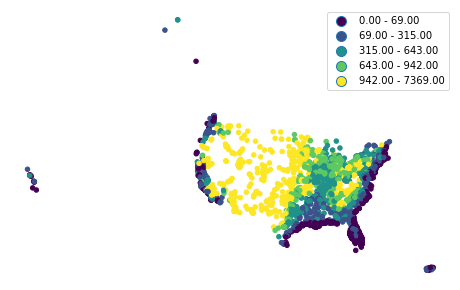

In [14]:
gplt.pointplot(cities, projection=gcrs.AlbersEqualArea(), hue='ELEV_IN_FT', legend=True)
plt.savefig('../figures/pointplot/pointplot-legend.png', **savefig_kwargs)

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


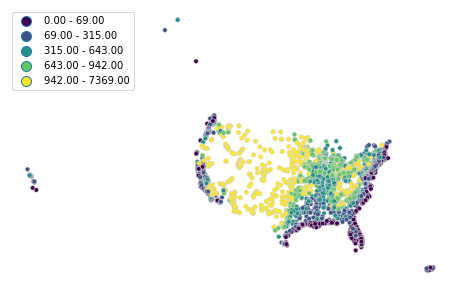

In [34]:
gplt.pointplot(
    cities, projection=gcrs.AlbersEqualArea(), 
    hue='ELEV_IN_FT',
    legend=True, legend_kwargs={'loc': 'upper left'},
    edgecolor='lightgray', linewidth=0.5
)
plt.savefig('../figures/pointplot/pointplot-kwargs.png', **savefig_kwargs)

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


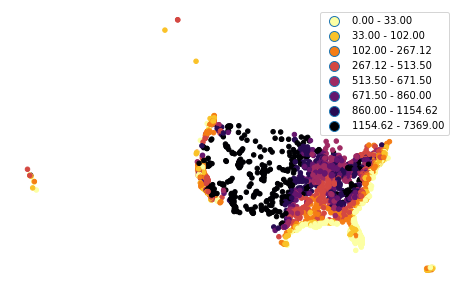

In [53]:
gplt.pointplot(
    cities, projection=gcrs.AlbersEqualArea(),
    hue='ELEV_IN_FT', k=8, cmap='inferno_r',
    legend=True
)
plt.savefig('../figures/pointplot/pointplot-k.png', **savefig_kwargs)

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


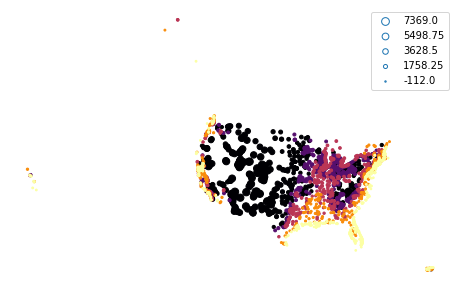

In [67]:
gplt.pointplot(
    cities, projection=gcrs.AlbersEqualArea(), 
    hue='ELEV_IN_FT', scale='ELEV_IN_FT', limits=(0.1, 3), cmap='inferno_r',
    legend=True, legend_var='scale'
)
plt.savefig('../figures/pointplot/pointplot-scale.png', **savefig_kwargs)

# Polyplot

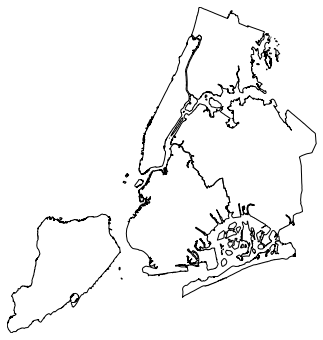

In [68]:
gplt.polyplot(boroughs, projection=gcrs.AlbersEqualArea())
plt.savefig('../figures/polyplot/polyplot-initial.png', **savefig_kwargs)

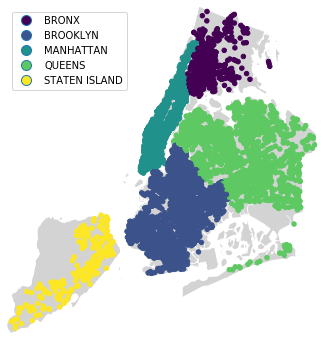

In [83]:
ax = gplt.polyplot(
    boroughs, projection=gcrs.AlbersEqualArea(),
    edgecolor='None', facecolor='lightgray'
)
gplt.pointplot(
    collisions[collisions['BOROUGH'].notnull()], projection=gcrs.AlbersEqualArea(), 
    hue='BOROUGH', ax=ax, legend=True
)
plt.savefig('../figures/polyplot/polyplot-stacked.png', **savefig_kwargs)

# Choropleth

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


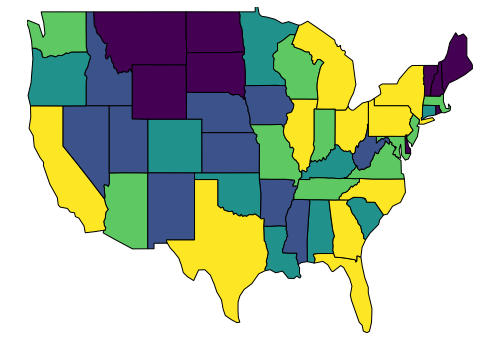

In [6]:
gplt.choropleth(contiguous_usa, hue='population')
plt.savefig('../figures/choropleth/choropleth-initial.png', **savefig_kwargs)

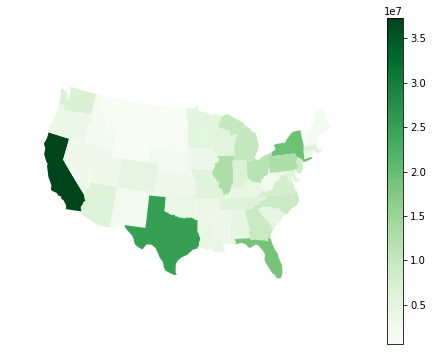

In [21]:
gplt.choropleth(
    contiguous_usa, hue='population', projection=gcrs.AlbersEqualArea(),
    cmap='Greens', k=None, legend=True
)
plt.savefig('../figures/choropleth/choropleth-cmap.png', **savefig_kwargs)

In [ ]:
gplt.choropleth(boroughs, projection=gcrs.AlbersEqualArea(), hue='BoroName', categorical=True)
plt.savefig('../figures/choropleth/choropleth-categorical.png', **savefig_kwargs)

In [ ]:
gplt.choropleth(boroughs, projection=gcrs.AlbersEqualArea(), hue='BoroName', categorical=True,
                legend=True)
plt.savefig('../figures/choropleth/choropleth-legend.png', **savefig_kwargs)

In [ ]:
gplt.choropleth(boroughs, projection=gcrs.AlbersEqualArea(), hue='BoroName', categorical=True,
                legend=True, legend_kwargs={'loc': 'upper left'})
plt.savefig('../figures/choropleth/choropleth-legend-kwargs.png', **savefig_kwargs)

In [ ]:
gplt.choropleth(boroughs, projection=gcrs.AlbersEqualArea(), hue='BoroName', categorical=True,
                linewidth=0)
plt.savefig('../figures/choropleth/choropleth-kwargs.png', **savefig_kwargs)

In [ ]:
from random import randint
census_tracts['mock_data'] = [randint(10, 1000) for _ in range(len(census_tracts))]
census_tracts['mock_category'] = [randint(1, 5) for _ in range(len(census_tracts))]

In [ ]:
gplt.choropleth(census_tracts, hue='mock_data', projection=gcrs.AlbersEqualArea(),
                legend=True, edgecolor='white', linewidth=0.5, legend_kwargs={'loc': 'upper left'},
                k=2)
plt.savefig('../figures/choropleth/choropleth-k.png', **savefig_kwargs)

In [ ]:
gplt.choropleth(census_tracts, hue='mock_data', projection=gcrs.AlbersEqualArea(),
                legend=True, edgecolor='white', linewidth=0.5, cmap='viridis',
                k=None)
plt.savefig('../figures/choropleth/choropleth-k-none.png', **savefig_kwargs)

In [ ]:
gplt.choropleth(census_tracts, hue='mock_data', projection=gcrs.AlbersEqualArea(),
                edgecolor='white', linewidth=0.5,
                legend=True, legend_kwargs={'loc': 'upper left'},
                legend_labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.savefig('../figures/choropleth/choropleth-legend-labels.png', **savefig_kwargs)

In [ ]:
gplt.choropleth(census_tracts, hue='mock_data', projection=gcrs.AlbersEqualArea(),
                legend=True, edgecolor='white', linewidth=0.5, legend_kwargs={'loc': 'upper left'},
                scheme='equal_interval')
plt.savefig('../figures/choropleth/choropleth-scheme.png', **savefig_kwargs)

# Aggplot

In [ ]:
from shapely.geometry import Point

collisions['LATITUDE'] = collisions['LATITUDE'].astype(float)
collisions['LONGITUDE'] = collisions['LONGITUDE'].astype(float)

latmax, latmin, longmax, longmin = collisions['LATITUDE'].max(), collisions['LATITUDE'].min(),\
                                   collisions['LONGITUDE'].max(), collisions['LONGITUDE'].min()
    
def genpattern(srs):
    return (srs['LATITUDE'] - latmin) / (latmax - latmin)

collisions['LATDEP'] = collisions.apply(genpattern, axis='columns')

In [ ]:
gplt.aggplot(collisions, projection=gcrs.PlateCarree(), hue='LATDEP')
plt.savefig('../figures/aggplot/aggplot-initial.png', **savefig_kwargs)

In [ ]:
gplt.aggplot(collisions, nmin=10, nmax=250, nsig=5, projection=gcrs.PlateCarree(), hue='LATDEP', cmap='Blues')
plt.savefig('../figures/aggplot/aggplot-quadtree-tuned.png', **savefig_kwargs)

In [ ]:
gplt.aggplot(collisions, projection=gcrs.PlateCarree(), hue='NUMBER OF PERSONS INJURED', cmap='Reds',
             by='BOROUGH')
plt.savefig('../figures/aggplot/aggplot-hulls.png', **savefig_kwargs)

In [ ]:
boroughs_2 = boroughs.set_index('BoroName')
boroughs_2.index = [b.upper() for b in boroughs_2.index]
gplt.aggplot(collisions, projection=gcrs.PlateCarree(), hue='NUMBER OF PERSONS INJURED', cmap='Reds',
             geometry=boroughs_2, by='BOROUGH')
plt.savefig('../figures/aggplot/aggplot-by.png', **savefig_kwargs)

In [ ]:
boroughs_2 = boroughs.set_index('BoroName')
boroughs_2.index = [b.upper() for b in boroughs_2.index]
gplt.aggplot(collisions, projection=gcrs.PlateCarree(), hue='NUMBER OF PERSONS INJURED', cmap='Reds',
             geometry=boroughs_2, by='BOROUGH', agg=len)
plt.savefig('../figures/aggplot/aggplot-agg.png', **savefig_kwargs)

In [ ]:
gplt.aggplot(collisions, projection=gcrs.PlateCarree(), hue='NUMBER OF PERSONS INJURED', cmap='Reds',
             geometry=boroughs_2, by='BOROUGH', agg=len, legend=False)
plt.savefig('../figures/aggplot/aggplot-legend.png', **savefig_kwargs)

In [ ]:
gplt.aggplot(collisions, projection=gcrs.PlateCarree(), hue='NUMBER OF PERSONS INJURED', cmap='Reds',
             geometry=boroughs_2, by='BOROUGH', agg=len, linewidth=0)
plt.savefig('../figures/aggplot/aggplot-kwargs.png', **savefig_kwargs)

In [ ]:
gplt.aggplot(collisions, projection=gcrs.PlateCarree(), hue='NUMBER OF PERSONS INJURED', cmap='Reds',
             geometry=boroughs_2, by='BOROUGH', agg=len, linewidth=0, 
             legend_kwargs={'orientation': 'horizontal'})
plt.savefig('../figures/aggplot/aggplot-legend-kwargs.png', **savefig_kwargs)

# Cartogram

In [ ]:
boroughs['Population'] = [378, 1951, 2300, 1487, 1203]
boroughs['Population Density'] = boroughs['Population'] / boroughs['Shape_Area']

In [ ]:
gplt.cartogram(boroughs, scale='Population Density', projection=gcrs.AlbersEqualArea())
plt.savefig('../figures/cartogram/cartogram-initial.png', **savefig_kwargs)

In [ ]:
gplt.cartogram(boroughs, scale='Population Density', projection=gcrs.AlbersEqualArea(),
               trace=False, legend=True)
plt.savefig('../figures/cartogram/cartogram-trace-legend.png', **savefig_kwargs)

In [ ]:
gplt.cartogram(boroughs, scale='Population Density', projection=gcrs.AlbersEqualArea(),
               trace=False, legend=True, legend_kwargs={'loc': 'upper left'})
plt.savefig('../figures/cartogram/cartogram-legend-kwargs.png', **savefig_kwargs)

In [ ]:
gplt.cartogram(boroughs, scale='Population Density', projection=gcrs.AlbersEqualArea(), legend=True,
               legend_values=[2.32779655e-07, 6.39683197e-07, 1.01364661e-06, 1.17380941e-06, 2.33642596e-06][::-1],
               legend_labels=['Manhattan', 'Brooklyn', 'Queens', 'The Bronx', 'Staten Island'],
               legend_kwargs={'loc': 'upper left'})
plt.savefig('../figures/cartogram/cartogram-legend-labels.png', **savefig_kwargs)

In [ ]:
gplt.cartogram(boroughs, scale='Population Density', projection=gcrs.AlbersEqualArea(),
               edgecolor='darkgreen')
plt.savefig('../figures/cartogram/cartogram-kwargs.png', **savefig_kwargs)

In [ ]:
gplt.cartogram(boroughs, scale='Population Density', projection=gcrs.AlbersEqualArea(),
               trace_kwargs={'edgecolor': 'lightgreen'})
plt.savefig('../figures/cartogram/cartogram-trace-kwargs.png', **savefig_kwargs)

In [ ]:
gplt.cartogram(boroughs, scale='Population Density', projection=gcrs.AlbersEqualArea(),
               limits=(0.5, 1))
plt.savefig('../figures/cartogram/cartogram-limits.png', **savefig_kwargs)

In [ ]:
def trivial_scale(minval, maxval):
    def scalar(val):
        return 0.5
    return scalar

gplt.cartogram(boroughs, scale='Population Density', projection=gcrs.AlbersEqualArea(),
               limits=(0.5, 1), scale_func=trivial_scale)
plt.savefig('../figures/cartogram/cartogram-scale-func.png', **savefig_kwargs)

In [ ]:
gplt.cartogram(boroughs, scale='Population Density', projection=gcrs.AlbersEqualArea(),
               hue='Population Density', k=None, cmap='Blues')
plt.savefig('../figures/cartogram/cartogram-hue.png', **savefig_kwargs)

## KDEPlot

In [ ]:
ax = gplt.kdeplot(collisions, projection=gcrs.AlbersEqualArea())
plt.savefig('../figures/kdeplot/kdeplot-initial.png', **savefig_kwargs)

In [ ]:
ax = gplt.kdeplot(collisions, projection=gcrs.AlbersEqualArea())
gplt.polyplot(boroughs, projection=gcrs.AlbersEqualArea(), ax=ax)
plt.savefig('../figures/kdeplot/kdeplot-overlay.png', **savefig_kwargs)

In [ ]:
ax = gplt.kdeplot(collisions, projection=gcrs.AlbersEqualArea(), shade=True)
gplt.polyplot(boroughs, projection=gcrs.AlbersEqualArea(), ax=ax)
plt.savefig('../figures/kdeplot/kdeplot-shade.png', **savefig_kwargs)

In [ ]:
ax = gplt.kdeplot(collisions, projection=gcrs.AlbersEqualArea(), n_levels=30)
gplt.polyplot(boroughs, projection=gcrs.AlbersEqualArea(), ax=ax)
plt.savefig('../figures/kdeplot/kdeplot-n-levels.png', **savefig_kwargs)

In [ ]:
ax = gplt.kdeplot(collisions, projection=gcrs.AlbersEqualArea(), cmap='Purples')
gplt.polyplot(boroughs, projection=gcrs.AlbersEqualArea(), ax=ax)
plt.savefig('../figures/kdeplot/kdeplot-cmap.png', **savefig_kwargs)

In [ ]:
ax = gplt.kdeplot(collisions, projection=gcrs.AlbersEqualArea(),
                  shade=True, clip=boroughs.geometry)
gplt.polyplot(boroughs, projection=gcrs.AlbersEqualArea(), ax=ax)
plt.savefig('../figures/kdeplot/kdeplot-clip.png', **savefig_kwargs)

## Sankey

In [ ]:
la_flights = gpd.read_file(geoplot_data.la_flights())
la_flights = la_flights.assign(
    start=la_flights.geometry.map(lambda mp: mp[0]),
    end=la_flights.geometry.map(lambda mp: mp[1])
)

In [ ]:
ax = gplt.sankey(la_flights, start='start', end='end', projection=gcrs.PlateCarree())
ax.set_global(); ax.coastlines()
plt.savefig('../figures/sankey/sankey-geospatial-context.png', **savefig_kwargs)

In [ ]:
ax = gplt.sankey(la_flights, start='start', end='end', projection=gcrs.Orthographic())
ax.set_global(); ax.coastlines(); ax.outline_patch.set_visible(True)
plt.savefig('../figures/sankey/sankey-greatest-circle-distance.png', **savefig_kwargs)

In [ ]:
import cartopy.crs as ccrs
ax = gplt.sankey(la_flights, start='start', end='end', projection=gcrs.PlateCarree(), path=ccrs.PlateCarree())
ax.set_global(); ax.coastlines()
plt.savefig('../figures/sankey/sankey-path-projection.png', **savefig_kwargs)

In [ ]:
network = utils.uniform_random_global_network()

In [ ]:
gplt.sankey(dc, path=dc.geometry, projection=gcrs.AlbersEqualArea(), scale='aadt')
plt.savefig('../figures/sankey/sankey-path.png', **savefig_kwargs)

In [ ]:
ax = gplt.sankey(network, projection=gcrs.PlateCarree(),
                 start='from', end='to',
                 hue='mock_variable')
ax.set_global()
ax.coastlines()
plt.savefig('../figures/sankey/sankey-hue.png', **savefig_kwargs)

In [ ]:
ax = gplt.sankey(network, projection=gcrs.PlateCarree(),
                 start='from', end='to',
                 hue='mock_variable', cmap='RdYlBu')
ax.set_global()
ax.coastlines()
plt.savefig('../figures/sankey/sankey-cmap.png', **savefig_kwargs)

In [ ]:
ax = gplt.sankey(network, projection=gcrs.PlateCarree(),
                 start='from', end='to',
                 hue='mock_variable', cmap='RdYlBu',
                 legend=True)
ax.set_global()
ax.coastlines()
plt.savefig('../figures/sankey/sankey-legend.png', **savefig_kwargs)

In [ ]:
ax = gplt.sankey(network, projection=gcrs.PlateCarree(),
                 start='from', end='to',
                 hue='mock_variable', cmap='RdYlBu',
                 legend=True, legend_kwargs={'bbox_to_anchor': (1.1, 1.0)})
ax.set_global()
ax.coastlines()
plt.savefig('../figures/sankey/sankey-legend-kwargs.png', **savefig_kwargs)

In [ ]:
ax = gplt.sankey(network, projection=gcrs.PlateCarree(),
                 start='from', end='to',
                 hue='mock_variable', cmap='RdYlBu',
                 legend=True, legend_kwargs={'bbox_to_anchor': (1.1, 1.0)},
                 legend_labels=['Very Low', 'Low', 'Average', 'High', 'Very High'])
ax.set_global()
ax.coastlines()
plt.savefig('../figures/sankey/sankey-legend-labels.png', **savefig_kwargs)

In [ ]:
ax = gplt.sankey(network, projection=gcrs.PlateCarree(),
                 start='from', end='to',
                 hue='mock_variable', cmap='RdYlBu',
                 legend=True, legend_kwargs={'bbox_to_anchor': (1.1, 1.0)},
                 k=3)
ax.set_global()
ax.coastlines()
plt.savefig('../figures/sankey/sankey-k.png', **savefig_kwargs)

In [ ]:
ax = gplt.sankey(network, projection=gcrs.PlateCarree(),
                 start='from', end='to',
                 hue='mock_variable', cmap='RdYlBu',
                 legend=True, legend_kwargs={'bbox_to_anchor': (1.1, 1.0)},
                 k=3, scheme='equal_interval')
ax.set_global()
ax.coastlines()
plt.savefig('../figures/sankey/sankey-scheme.png', **savefig_kwargs)

In [ ]:
network['above_meridian'] = network['from'].map(lambda point: point.y > 0)

In [ ]:
ax = gplt.sankey(network, projection=gcrs.PlateCarree(),
                 start='from', end='to',
                 hue='above_meridian', cmap='RdYlBu',
                 legend=True, legend_kwargs={'bbox_to_anchor': (1.1, 1.0)},
                 categorical=True)
ax.set_global()
ax.coastlines()
plt.savefig('../figures/sankey/sankey-categorical.png', **savefig_kwargs)

In [ ]:
network['mock_data'] = [np.random.normal(100, 50) for _ in range(len(network))]

In [ ]:
ax = gplt.sankey(la_flights, projection=gcrs.PlateCarree(),
                 extent=(-125.0011, -66.9326, 24.9493, 49.5904),
                 start='start', end='end',
                 scale='Passengers',
                 limits=(0.1, 5),
                 legend=True, legend_kwargs={'bbox_to_anchor': (1.1, 1.0)})
ax.coastlines()
plt.savefig('../figures/sankey/sankey-scale.png', **savefig_kwargs)

In [ ]:
def trivial_scale(minval, maxval):
    return lambda v: 1

ax = gplt.sankey(la_flights, projection=gcrs.PlateCarree(),
                 extent=(-125.0011, -66.9326, 24.9493, 49.5904),
                 start='start', end='end',
                 scale='Passengers', scale_func=trivial_scale,
                 legend=True, legend_kwargs={'bbox_to_anchor': (1.1, 1.0)})
ax.coastlines()
plt.savefig('../figures/sankey/sankey-scale-func.png', **savefig_kwargs)

In [ ]:
ax = gplt.sankey(network, projection=gcrs.PlateCarree(),
                 start='from', end='to',
                 scale='mock_data',
                 legend=True, legend_kwargs={'bbox_to_anchor': (1.1, 1.0)},
                 hue='mock_data', legend_var="hue")
ax.set_global()
ax.coastlines()
plt.savefig('../figures/sankey/sankey-legend-var.png', **savefig_kwargs)

## Voronoi

In [ ]:
boroughs = gpd.read_file(geoplot_data.nyc_boroughs())
injurious_collisions = gpd.read_file(geoplot_data.nyc_injurious_collisions())

In [ ]:
ax = gplt.voronoi(injurious_collisions.head(1000))
gplt.polyplot(boroughs, ax=ax)
plt.savefig('../figures/voronoi/voronoi-simple.png', **savefig_kwargs)

In [ ]:
ax = gplt.voronoi(injurious_collisions.head(1000), hue='NUMBER OF PERSONS INJURED', cmap='Reds')
gplt.polyplot(boroughs, ax=ax)
plt.savefig('../figures/voronoi/voronoi-cmap.png', **savefig_kwargs)

In [ ]:
ax = gplt.voronoi(injurious_collisions.head(1000), hue='NUMBER OF PERSONS INJURED', cmap='Reds', 
                  clip=boroughs.geometry)
gplt.polyplot(boroughs, ax=ax)
plt.savefig('../figures/voronoi/voronoi-clip.png', **savefig_kwargs)

In [ ]:
ax = gplt.voronoi(injurious_collisions.head(1000), hue='NUMBER OF PERSONS INJURED', cmap='Reds',
                  clip=boroughs.geometry,
                  legend=True, legend_kwargs={'loc': 'upper left'},
                  linewidth=0.5, edgecolor='white',
                 )
gplt.polyplot(boroughs, ax=ax)
plt.savefig('../figures/voronoi/voronoi-kwargs.png', **savefig_kwargs)

In [ ]:
ax = gplt.voronoi(injurious_collisions.head(1000), 
                  hue='NUMBER OF PERSONS INJURED', cmap='Reds', k=5, scheme='fisher_jenks',
                  clip=boroughs.geometry,
                  legend=True, legend_kwargs={'loc': 'upper left'},
                  linewidth=0.5, edgecolor='white', 
                 )
gplt.polyplot(boroughs, ax=ax)
plt.savefig('../figures/voronoi/voronoi-scheme.png', **savefig_kwargs)

In [ ]:
ax = gplt.voronoi(injurious_collisions.head(1000), hue='NUMBER OF PERSONS INJURED', cmap='Reds',
                  edgecolor='white', clip=boroughs.geometry,
                  legend=True,
                  linewidth=0.5, categorical=True
             )
gplt.polyplot(boroughs, linewidth=1, ax=ax)
plt.savefig('../figures/voronoi/voronoi-multiparty.png', **savefig_kwargs)